# Model `FastStep`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
# from generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
# data.generate(seed=1997)

# data.add_noise(noise=[0.4, 0.1], seed=2000)
# data.show_matrix()

In [3]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720697731
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720697731


c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] k            : 5
[I] U            : None
[I] V            : None
[I] W            : full
[I] tau          : 20
[I] solver       : line-search
[I] tol          : 0
[I] min_diff     : 0.001
[I] max_round    : 5
[I] max_iter     : 20
[I] init_method  : uniform
[I] seed         : 1720697742
[I] verbose      : False
[I] display      : False
[I] show_logs    : False
[I] task         : reconstruction
[I]   show_logs  : False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0002, 0.2394], V: [0.0000, 0.2395]
[I] Normalized to  : U: [0.0009, 1.0000], V: [0.0002, 1.0000]


[W] Stopped in advance: Reach maximum round
[W] Timer not started.


[I] model saved as: 24-07-11_19-37-07_FastStep.pickle


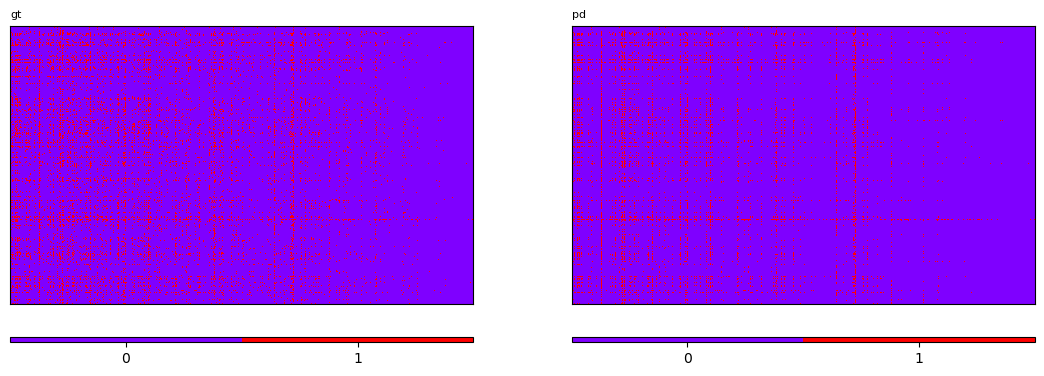

<Figure size 640x480 with 0 Axes>

In [5]:
from models import FastStep

k = 5
# W = 'mask'
W = 'full'
tol = 0
tau = 20
min_diff = 0.001
max_iter = 20
max_round = 5
init_method = 'uniform'

model = FastStep(k=k, U=None, V=None, W=W, tau=tau, solver='line-search', tol=tol, min_diff=min_diff, max_round=max_round, max_iter=max_iter, init_method=init_method, seed=None)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False)

# Result on ordinary multiplication

X ~ (U @ V) - τ

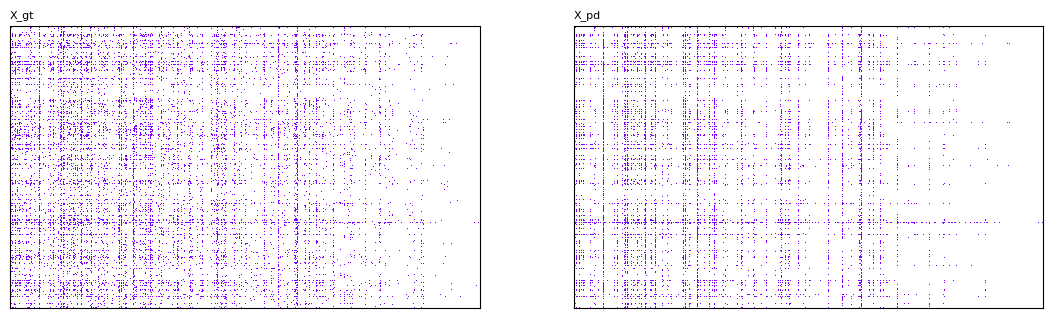

<Figure size 640x480 with 0 Axes>

In [6]:
from utils import get_prediction, binarize, show_matrix, show_factor_distribution, matmul

X_pd = get_prediction(U=model.U, V=model.V, boolean=False)
X_pd = binarize(X_pd, model.tau)
show_matrix([(X_train, [0, 0], 'X_gt'), (X_pd, [0, 1], 'X_pd')], scaling=0.5)

# Result on Boolean multiplication

X ~ matmul( (U - u), (V - v) )

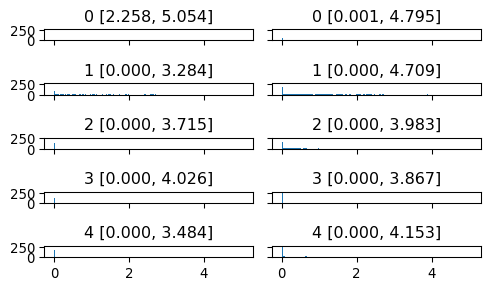

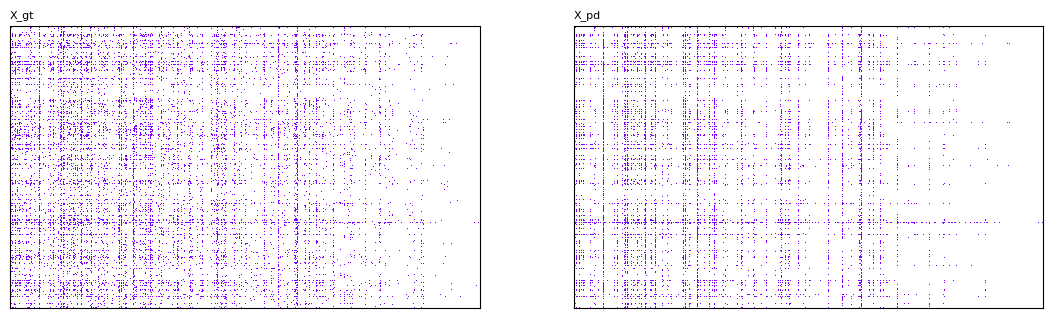

<Figure size 640x480 with 0 Axes>

In [7]:
U = model.U.copy()
V = model.V.copy()

show_factor_distribution(U=U, V=V)

k = model.k
W = model.W

# initial guess
# threshold = 0.5
threshold = model.tau

U_bool = binarize(U, threshold)
V_bool = binarize(V, threshold)

X_bool = matmul(U_bool, V_bool.T, sparse=True, boolean=True)
# X_bool = U_bool @ V_bool.T
# X_bool = binarize(X_bool, 0.5)
# show_matrix([(X_bool, [0, 0], 'X_bool'), (U_bool, [0, 1], 'U_bool'), (V_bool.T, [1, 0], 'V_bool')], scaling=0.5, colorbar=True)

show_matrix([(X_train, [0, 0], 'X_gt'), (X_pd, [0, 1], 'X_pd')], scaling=0.5)

In [ ]:
import numpy as np

for threshold in np.linspace(0.2, 2.0, 10, True):
    print(threshold)
    


# BinaryMFThreshold

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.5
[I] v            : 0.5
[I] lamda        : 100
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1720517696
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [1e-05, 5.1715173320652505] -> [1.933668468632298e-06, 1.0], V: [1e-05, 4.958195796506283] -> [2.0168626674739928e-06, 1.0]
[I] iter: 1, start: [0.500, 0.500], direction: [34676.699, 34280.575]
[I] iter: 2, start: [1.000, 1.000], direction: [-29.122, -22.685]
[I] iter: 3, start: [0.772, 0.823], direction: [11719.595, 27718.788]
[I] iter: 4, start: [0.795, 0.876], direction: [1698.949, -6517.973]
[I] iter: 5, start: [0.808, 0.826], direction: [9428.477, 12696.683]
[I] iter: 6, start: [0.826, 0.850], direction: [990.065, -4833.363]
[I

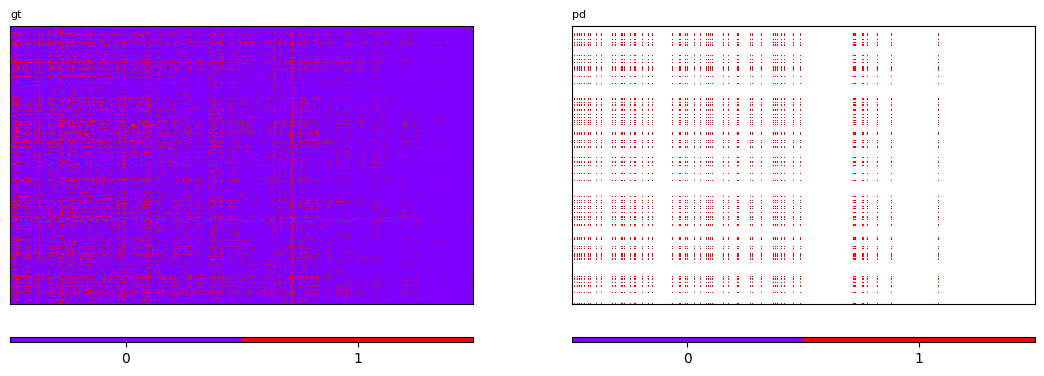

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   09/07/24 05:34:56    0  0.500000  0.500000  43128.930514  0.986796   
1   09/07/24 05:34:57    1  1.000000  1.000000   5376.508325  0.000093   
2   09/07/24 05:34:57    2  0.772483  0.822771   5034.306795  0.381253   
3   09/07/24 05:34:57    3  0.794836  0.875641   4636.860138  0.148968   
4   09/07/24 05:34:57    4  0.807798  0.825913   4575.674027  0.324530   
5   09/07/24 05:34:57    5  0.825782  0.850130   4447.993942  0.214525   
6   09/07/24 05:34:57    6  0.829559  0.831692   4401.160323  0.266412   
7   09/07/24 05:34:57    7  0.842043  0.838880   4384.571632  0.239446   
8   09/07/24 05:34:58    8  0.846006  0.823857   4363.714312  0.278036   
9   09/07/24 05:34:58    9  0.853794  0.830442   4344.124295  0.241585   
10  09/07/24 05:34:58   10  0.856051  0.819752   4340.113701  0.286219   
11  09/07/24 05:34:58   11  0.861611  0.825225   4331.676938  0.233495   
12  09/07/24 05:34:58   12  0.860488  0.821533   4328.975225  0.266505   
13  09/07/24 05:34:58   13  0.862023  0.822367   4328.342099  0.255905   
14  09/07/24 05:34:59   14  0.862117  0.821461   4328.109090  0.258137   
15  09/07/24 05:34:59   15  0.863186  0.821437   4327.988646  0.253766   
16  09/07/24 05:34:59   16  0.863071  0.820857   4327.916027  0.261391   
17  09/07/24 05:34:59   17  0.863350  0.820927   4327.892328  0.259252   
18  09/07/24 05:34:59   18  0.863486  0.820614   4327.877928  0.259252   
19  09/07/24 05:34:59   19  0.863646  0.820694   4327.870673  0.259252   
20  09/07/24 05:35:00   20  0.863682  0.820515   4327.868590  0.259252   
21  09/07/24 05:35:00   21  0.863778  0.820583   4327.865907  0.259252   
22  09/07/24 05:35:00   22  0.863778  0.820529   4327.865154  0.259252   

                                  
                                  
   Precision  Accuracy        F1  
0   0.109435  0.423327  0.197020  
1   1.000000  0.928313  0.000186  
2   0.436356  0.920333  0.406948  
3   0.645447  0.933120  0.242067  
4   0.512331  0.929427  0.397359  
5   0.637998  0.934960  0.321086  
6   0.589506  0.934107  0.366978  
7   0.621830  0.935033  0.345754  
8   0.575664  0.933547  0.374969  
9   0.615057  0.934787  0.346909  
10  0.568106  0.933227  0.380658  
11  0.615290  0.934580  0.338524  
12  0.587295  0.933987  0.366637  
13  0.595671  0.934200  0.358007  
14  0.591016  0.934007  0.359329  
15  0.596503  0.934193  0.356057  
16  0.587093  0.933867  0.361730  
17  0.590053  0.933980  0.360230  
18  0.590053  0.933980  0.360230  
19  0.590053  0.933980  0.360230  
20  0.590053  0.933980  0.360230  
21  0.590053  0.933980  0.360230  
22  0.590053  0.933980  0.360230

<Figure size 640x480 with 0 Axes>

In [6]:
from models import BinaryMFThreshold

u, v = 0.5, 0.5
U = model.U.copy()
V = model.V.copy()

model_thresholding_sigmoid = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, solver='line-search', init_method='custom', seed=None)
model_thresholding_sigmoid.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

# BinaryMFThresholdExSigmoid

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.5
[I] v            : 0.5
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1720517700
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [1e-05, 5.1715173320652505] -> [1.933668468632298e-06, 1.0], V: [1e-05, 4.958195796506283] -> [2.0168626674739928e-06, 1.0]
[I] iter: 1, start: [0.500, 0.500], direction: [2918.524, 1532.795]


d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:196: RuntimeWarning: overflow encountered in exp
  num = np.exp(-self.lamda * subtract(X, x)) * self.lamda
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:196: RuntimeWarning: overflow encountered in exp
  num = np.exp(-self.lamda * subtract(X, x)) * self.lamda
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:196: RuntimeWarning: overflow encountered in exp
  num = np.exp(-self.lamda * subtract(X, x)) * self.lamda
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:199: RuntimeWarning: invalid value encountered in multiply
  return num * denom_inv
d:\Dropbox\PyBMF\examples\..\models\BinaryMFThreshold.py:196: RuntimeWarning: overflo

[I] iter: 2, start: [1.000, 1.000], direction: [-1.288, -1.159]
[I] iter: 3, start: [0.799, 0.819], direction: [1780.569, 4051.933]
[I] iter: 4, start: [0.826, 0.881], direction: [-151.096, -700.419]
[I] iter: 5, start: [0.817, 0.838], direction: [617.819, 440.364]
[I] iter: 6, start: [0.836, 0.851], direction: [86.553, -528.699]
[I] iter: 7, start: [0.838, 0.835], direction: [348.968, 105.058]
[I] iter: 8, start: [0.859, 0.842], direction: [-350.942, -300.663]
[I] iter: 9, start: [0.849, 0.833], direction: [385.547, -137.857]
[I] iter: 10, start: [0.872, 0.824], direction: [27.003, -365.040]
[I] iter: 11, start: [0.873, 0.819], direction: [224.635, 358.553]
[I] iter: 12, start: [0.874, 0.821], direction: [58.117, -66.048]
[I] iter: 13, start: [0.876, 0.819], direction: [35.263, 124.873]
[I] iter: 14, start: [0.876, 0.820], direction: [-18.921, -0.619]
[I] iter: 15, start: [0.876, 0.820], direction: [-0.314, 11.341]
[I] iter: 16, start: [0.876, 0.820], direction: [-6.459, -10.397]
[I] 

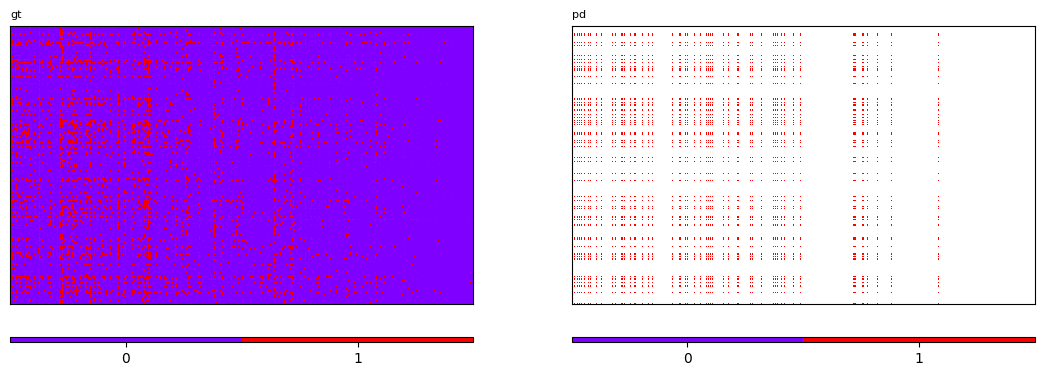

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   09/07/24 05:35:00    0  0.500000  0.500000  42535.398980  0.986796   
1   09/07/24 05:35:01    1  1.000000  1.000000   5308.280164  0.000093   
2   09/07/24 05:35:02    2  0.798757  0.818911   5129.907585  0.383764   
3   09/07/24 05:35:02    3  0.825927  0.880738   4758.123160  0.123861   
4   09/07/24 05:35:02    4  0.816705  0.837988   4651.696893  0.276455   
5   09/07/24 05:35:03    5  0.835559  0.851427   4601.206028  0.201506   
6   09/07/24 05:35:03    6  0.838200  0.835292   4586.335745  0.254417   
7   09/07/24 05:35:03    7  0.859500  0.841705   4560.914571  0.196764   
8   09/07/24 05:35:03    8  0.848790  0.832529   4546.073734  0.246885   
9   09/07/24 05:35:04    9  0.872322  0.824115   4527.723394  0.215176   
10  09/07/24 05:35:04   10  0.872734  0.818545   4527.027197  0.243351   
11  09/07/24 05:35:04   11  0.874447  0.821281   4520.447972  0.230147   
12  09/07/24 05:35:05   12  0.876221  0.819265   4520.268372  0.229961   
13  09/07/24 05:35:05   13  0.876490  0.820218   4519.648785  0.227543   
14  09/07/24 05:35:05   14  0.876201  0.820208   4519.621592  0.227543   
15  09/07/24 05:35:06   15  0.876197  0.820381   4519.620579  0.227543   
16  09/07/24 05:35:06   16  0.876147  0.820302   4519.615356  0.230426   
17  09/07/24 05:35:06   17  0.876141  0.820325   4519.615272  0.230426   

                                  
                                  
   Precision  Accuracy        F1  
0   0.109435  0.423327  0.197020  
1   1.000000  0.928313  0.000186  
2   0.454115  0.922747  0.415986  
3   0.736726  0.934013  0.212068  
4   0.570853  0.933227  0.372510  
5   0.659464  0.935293  0.308689  
6   0.605980  0.934687  0.358373  
7   0.670894  0.935493  0.304285  
8   0.614583  0.934907  0.352262  
9   0.632759  0.934780  0.321144  
10  0.601333  0.934187  0.346485  
11  0.614144  0.934440  0.334821  
12  0.613343  0.934400  0.334506  
13  0.616528  0.934473  0.332405  
14  0.616528  0.934473  0.332405  
15  0.616528  0.934473  0.332405  
16  0.614583  0.934467  0.335182  
17  0.614583  0.934467  0.335182

<Figure size 640x480 with 0 Axes>

In [7]:
from models import BinaryMFThresholdExSigmoid

u, v = 0.5, 0.5
U = model.U.copy()
V = model.V.copy()

model_thresholding_sigmoid = BinaryMFThresholdExSigmoid(k=k, U=U, V=V, W='full', u=u, v=v, solver='line-search', init_method='custom', seed=None)
model_thresholding_sigmoid.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

# BinaryMFThresholdExColumnwise

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] us           : 0.5
[I] vs           : 0.5
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] solver       : line-search
[I] seed         : 1720451501
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [1e-05, 10.502800575969134] -> [9.521269996195526e-07, 1.0], V: [1e-05, 8.154952033799185] -> [1.226248782157613e-06, 1.0]


[I] F: 5267.4800:   3%|▎         | 3/100 [00:00<00:23,  4.19it/s]
d:\Dropbox\PyBMF\examples\..\utils\display.py:170: RuntimeWarning: All-NaN slice encountered
  emin, emax = np.nanmin(data) < dmin, np.nanmax(data) > dmax


[W] Stopped in advance: Difference lower than threshold
[W] Timer not started.
[I] model saved as: 24-07-08_23-11-42_BinaryMFThresholdExColumnwise.pickle


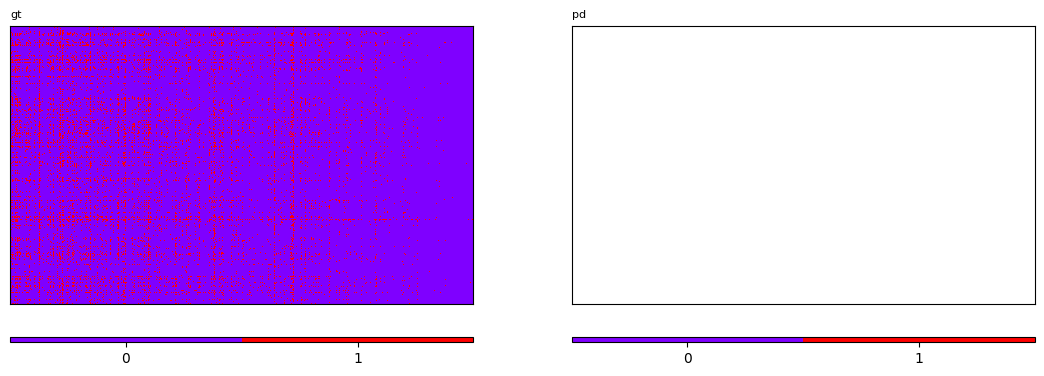

\
                                                                               
                time iter                                                 us   
0  08/07/24 11:11:41    0                          [0.5, 0.5, 0.5, 0.5, 0.5]   
1  08/07/24 11:11:41    1        [1e-05, 0.5, 0.5, 0.49999991224448825, 0.5]   
2  08/07/24 11:11:41    2  [0.00028537339091302315, 0.5, 0.5, 0.499999912...   
3  08/07/24 11:11:42    3  [0.0002653281112352998, 0.5, 0.5, 0.4999999122...   

                                                                   train  \
                                                                       0   
                                                  vs            F Recall   
0                          [0.5, 0.5, 0.5, 0.5, 0.5]  5376.973885    0.0   
1  [0.499999995508098, 0.49999999999999584, 0.5, ...  5267.498528    0.0   
2  [0.499999995508098, 0.49999999999999584, 0.5, ...  5267.480098    0.0   
3  [0.499999995508098, 0.49999999999999584, 0.5, ...  5267.480001    0.0   

                          
                          
  Precision  Accuracy F1  
0         0  0.928307  0  
1         0  0.928307  0  
2         0  0.928307  0  
3         0  0.928307  0

<Figure size 640x480 with 0 Axes>

In [10]:
from models import BinaryMFThresholdExColumnwise

us, vs = 0.5, 0.5

solver = 'line-search'
# solver = 'cd'
max_iter = 100

model_thresholding_sigmoid = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, W='full', us=us, vs=vs, solver=solver, max_iter=max_iter, init_method='custom', seed=None)
model_thresholding_sigmoid.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

# BinaryMFThresholdExSigmoidColumnwise

In [11]:
# from models import BinaryMFThresholdExSigmoidColumnwise

# # U = model.U.copy()
# # V = model.V.copy()

# # k = model.k
# # W = model.W

# for i in [.1, .2, .3, .4, .5, .6, .7, .8, .9]:

#     # u, v = 0.5, 0.5
#     us, vs = i, i

#     model_thresholding_sigmoid_columnwise = BinaryMFThresholdExSigmoidColumnwise(k=k, U=U, V=V, W=W, us=us, vs=vs, solver='line-search', init_method='custom', seed=None)
#     model_thresholding_sigmoid_columnwise.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

: 